#### 1. Polynomial Regression (world bank indicators)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format ='retina'

C:\Users\1000259375\AppData\Local\Temp\ipykernel_25872\1128877508.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
url ='https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/worldbank_gdp_gini_birth_death_suicide_rate.csv'
data = pd.read_csv(url)
data.sample(10)

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
2468,Chad,2009,1.893325e+10,NaN,47.194,15.047,NaN
15252,Virgin Islands (U.S.),1990,NaN,NaN,21.400,4.625,NaN
2542,Chile,1965,NaN,NaN,32.614,10.255,NaN
1534,Botswana,1960,NaN,NaN,47.281,17.687,NaN
14722,United Arab Emirates,1991,1.662994e+11,NaN,24.828,2.481,NaN
13349,St. Vincent and the Grenadines,1975,NaN,NaN,35.452,8.460,NaN
275,Andorra,1999,NaN,NaN,12.600,NaN,NaN
6832,Israel,2007,1.971678e+11,41.1,21.100,5.600,NaN
11915,Rwanda,2016,2.198223e+10,43.7,32.353,5.435,6.7
13,Afghanistan,1973,NaN,NaN,51.184,25.222,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          15576 non-null  object 
 1   year                                             15576 non-null  int64  
 2   GDP, PPP (current international $)               6726 non-null   float64
 3   Gini index (World Bank estimate)                 1649 non-null   float64
 4   Birth rate, crude (per 1,000 people)             14515 non-null  float64
 5   Death rate, crude (per 1,000 people)             14492 non-null  float64
 6   Suicide mortality rate (per 100,000 population)  1145 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 851.9+ KB


#### 1.1 filter and visualize country data

In [ ]:
data[data['country'].str.contains('Thailand')]

In [4]:
x_col='year'
y_col='Death rate, crude (per 1,000 people)'
# y_col='Birth rate, crude (per 1,000 people)'
country = 'Thailand'

In [5]:
df=data[data['country']==country].copy()
df

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
13983,Thailand,1960,NaN,NaN,42.735,13.180,NaN
13984,Thailand,1961,NaN,NaN,42.617,12.853,NaN
13985,Thailand,1962,NaN,NaN,42.469,12.534,NaN
13986,Thailand,1963,NaN,NaN,42.283,12.226,NaN
13987,Thailand,1964,NaN,NaN,42.041,11.929,NaN
13988,Thailand,1965,NaN,NaN,41.708,11.639,NaN
13989,Thailand,1966,NaN,NaN,41.244,11.346,NaN
13990,Thailand,1967,NaN,NaN,40.625,11.046,NaN
13991,Thailand,1968,NaN,NaN,39.845,10.733,NaN
13992,Thailand,1969,NaN,NaN,38.912,10.408,NaN


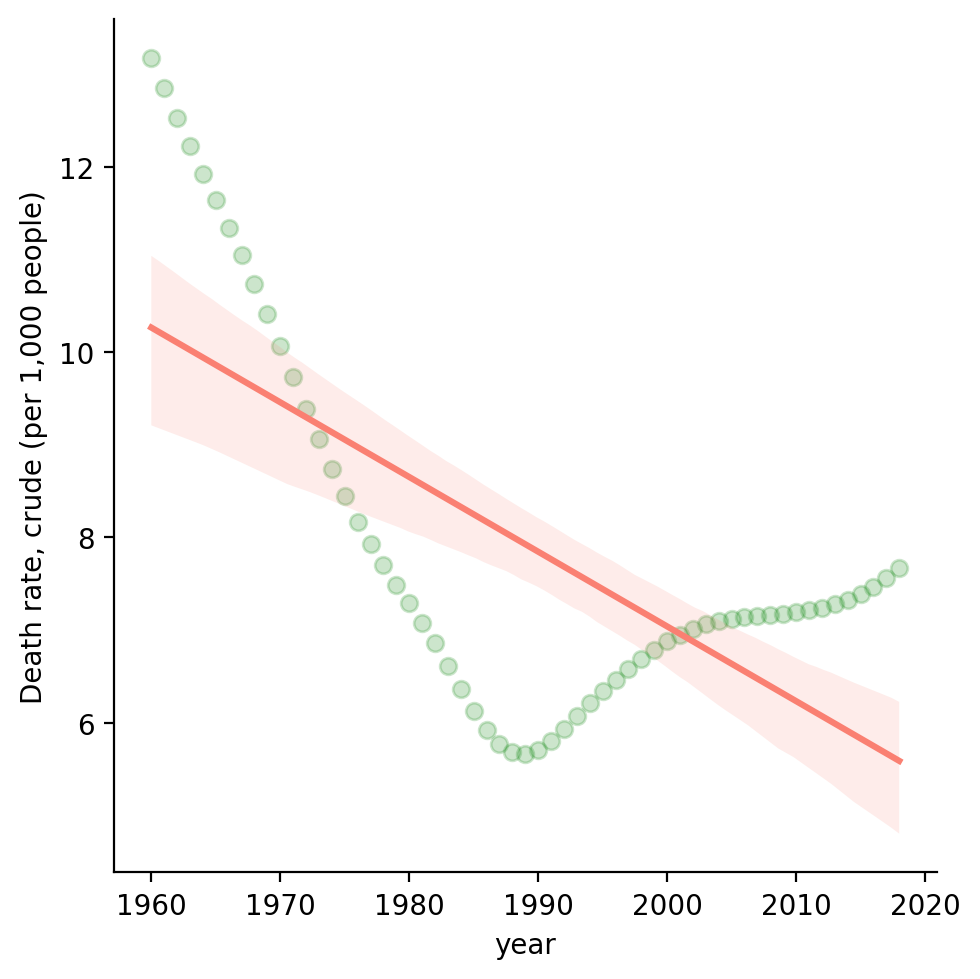

In [6]:
sns.lmplot(x=x_col, y=y_col, data=df, fit_reg=True,
            scatter_kws={'alpha': .2, 'color': 'green'},
            line_kws={'color': 'salmon'})
# linear regression cause high error

#### 1.2 scikit-learn

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [8]:
X=df[[x_col]]
y=df[y_col]

In [9]:
test_size =.2
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    random_state=1
)

#### 1.2.1 Linear regression; y = B0 + B1x + E

In [10]:
lm = LinearRegression()
lm

LinearRegression()

In [11]:
lm.fit(X_train, y_train)

LinearRegression()

In [12]:
lm.score(X_train, y_train) # R-squared

0.4353052622557835

In [13]:
lm.coef_

array([-0.07661316])

In [14]:
lm.intercept_

160.27616227662946

In [15]:
lm.score(X_test, y_test) # R-squared

0.5856015176097809

Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

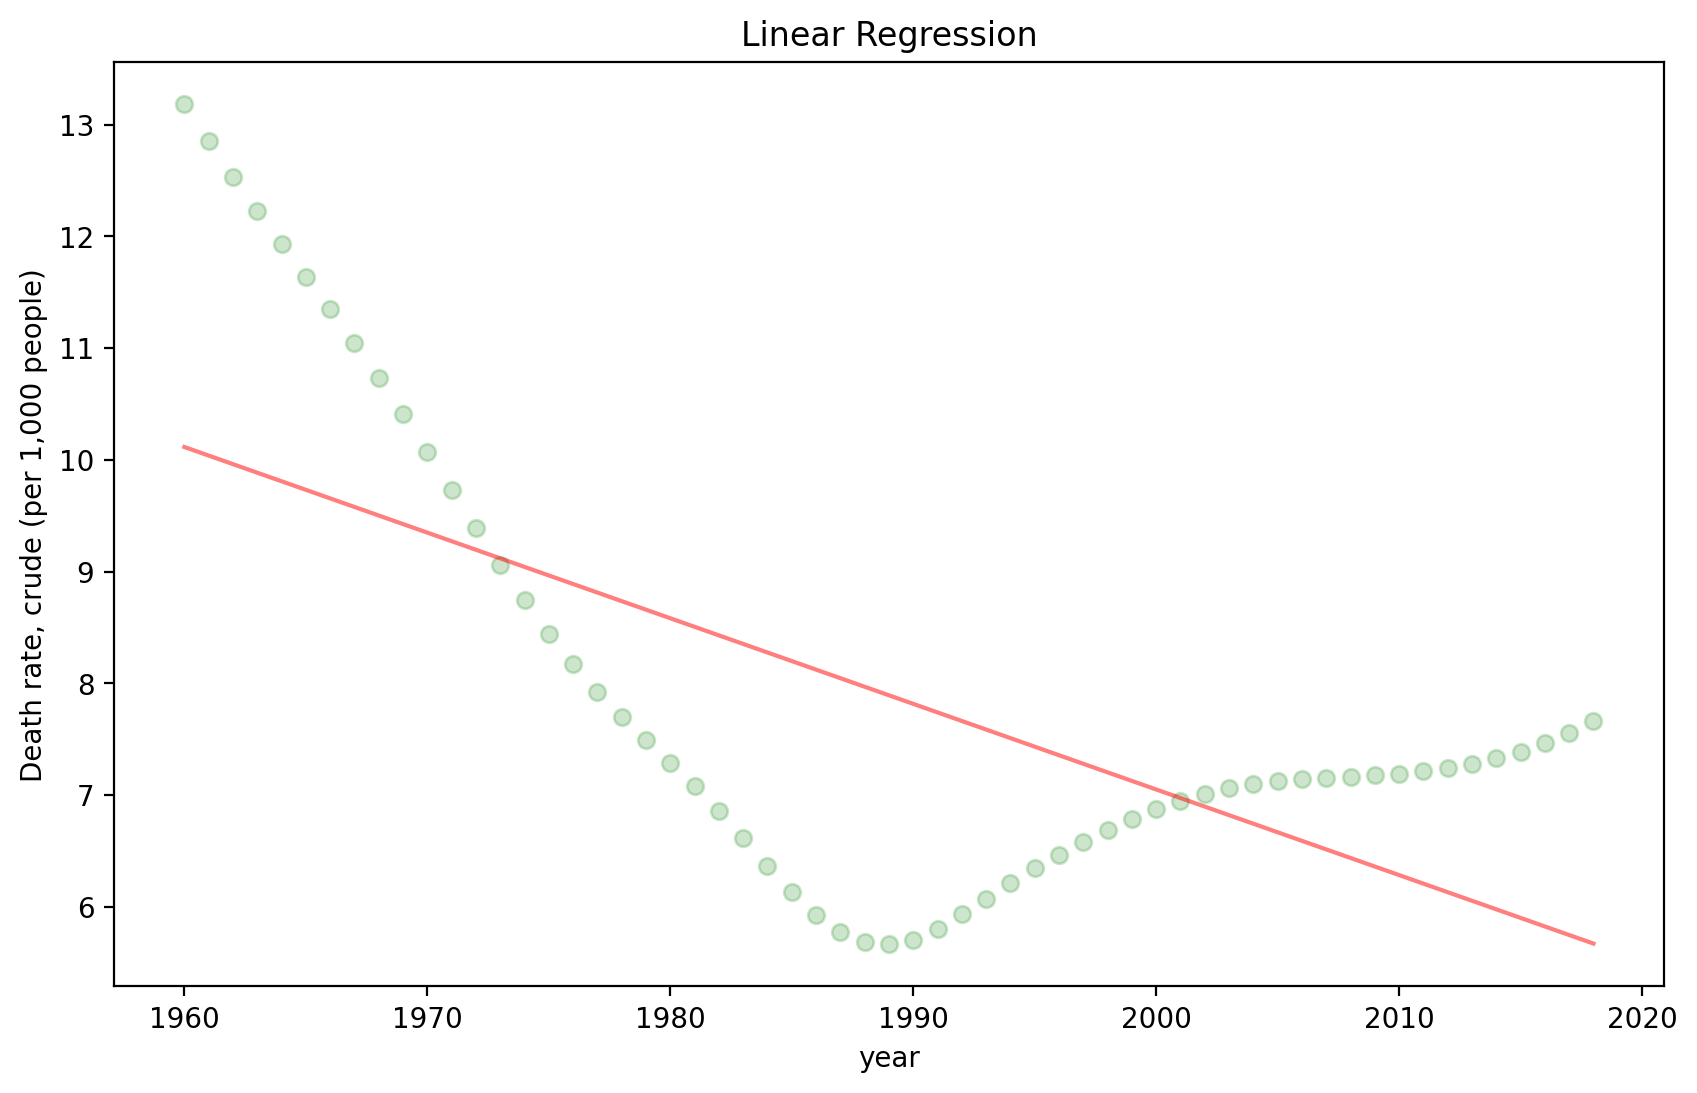

In [16]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X, y, color = 'green', alpha=.2)
plt.plot(X, lm.predict(X), color='red',alpha=.5)
plt.title('Linear Regression')
plt.xlabel(x_col)
plt.ylabel(y_col)

In [17]:
lm.predict([[1990],
            [2021]])

c:\Users\1000259375\Desktop\DE Project\PythonMLBasic\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.81597278, 5.44096481])

#### 1.2.2 Polynomial Regression; y = B0 + B1x^1 + B2x^2 +...+Bnx^n +E

In [18]:
poly_reg = PolynomialFeatures(degree=2)

In [19]:
poly_reg.fit_transform([[1900]])

array([[1.00e+00, 1.90e+03, 3.61e+06]])

In [20]:
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [21]:
X_train_poly[:3]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06]])

In [22]:
pm = LinearRegression()
pm.fit(X_train_poly, y_train)

LinearRegression()

In [24]:
pm.score(X_train_poly, y_train) # R-squared

0.9448282949367037

In [25]:
pm.intercept_

21619.43539756367

In [26]:
pm.coef_

array([ 0.00000000e+00, -2.16491346e+01,  5.42121601e-03])

In [27]:
pm.score(X_test_poly, y_test) # R-squared

0.9491064757890537

In [29]:
pm.intercept_ + sum((pm.coef_ * X_train_poly[0])) # rate of death in year at [0]

5.974124829725042

In [30]:
pm.predict(X_train_poly[:3])

array([5.97412483, 6.0303033 , 6.84646291])

In [31]:
pm.predict(poly_reg.fit_transform([[1996]]))

array([5.97412483])

In [32]:
pm.predict(poly_reg.fit_transform([[1996],[2000],[1984]]))

array([5.97412483, 6.0303033 , 6.84646291])

In [35]:
def predict(intercept, coef, x): # create polynomial formula
    v=intercept
    for p in range(len(coef)):
        v += x**p * coef[p]
    return v

In [36]:
predict(pm.intercept_, pm.coef_, 1996)

5.974124829725042

Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

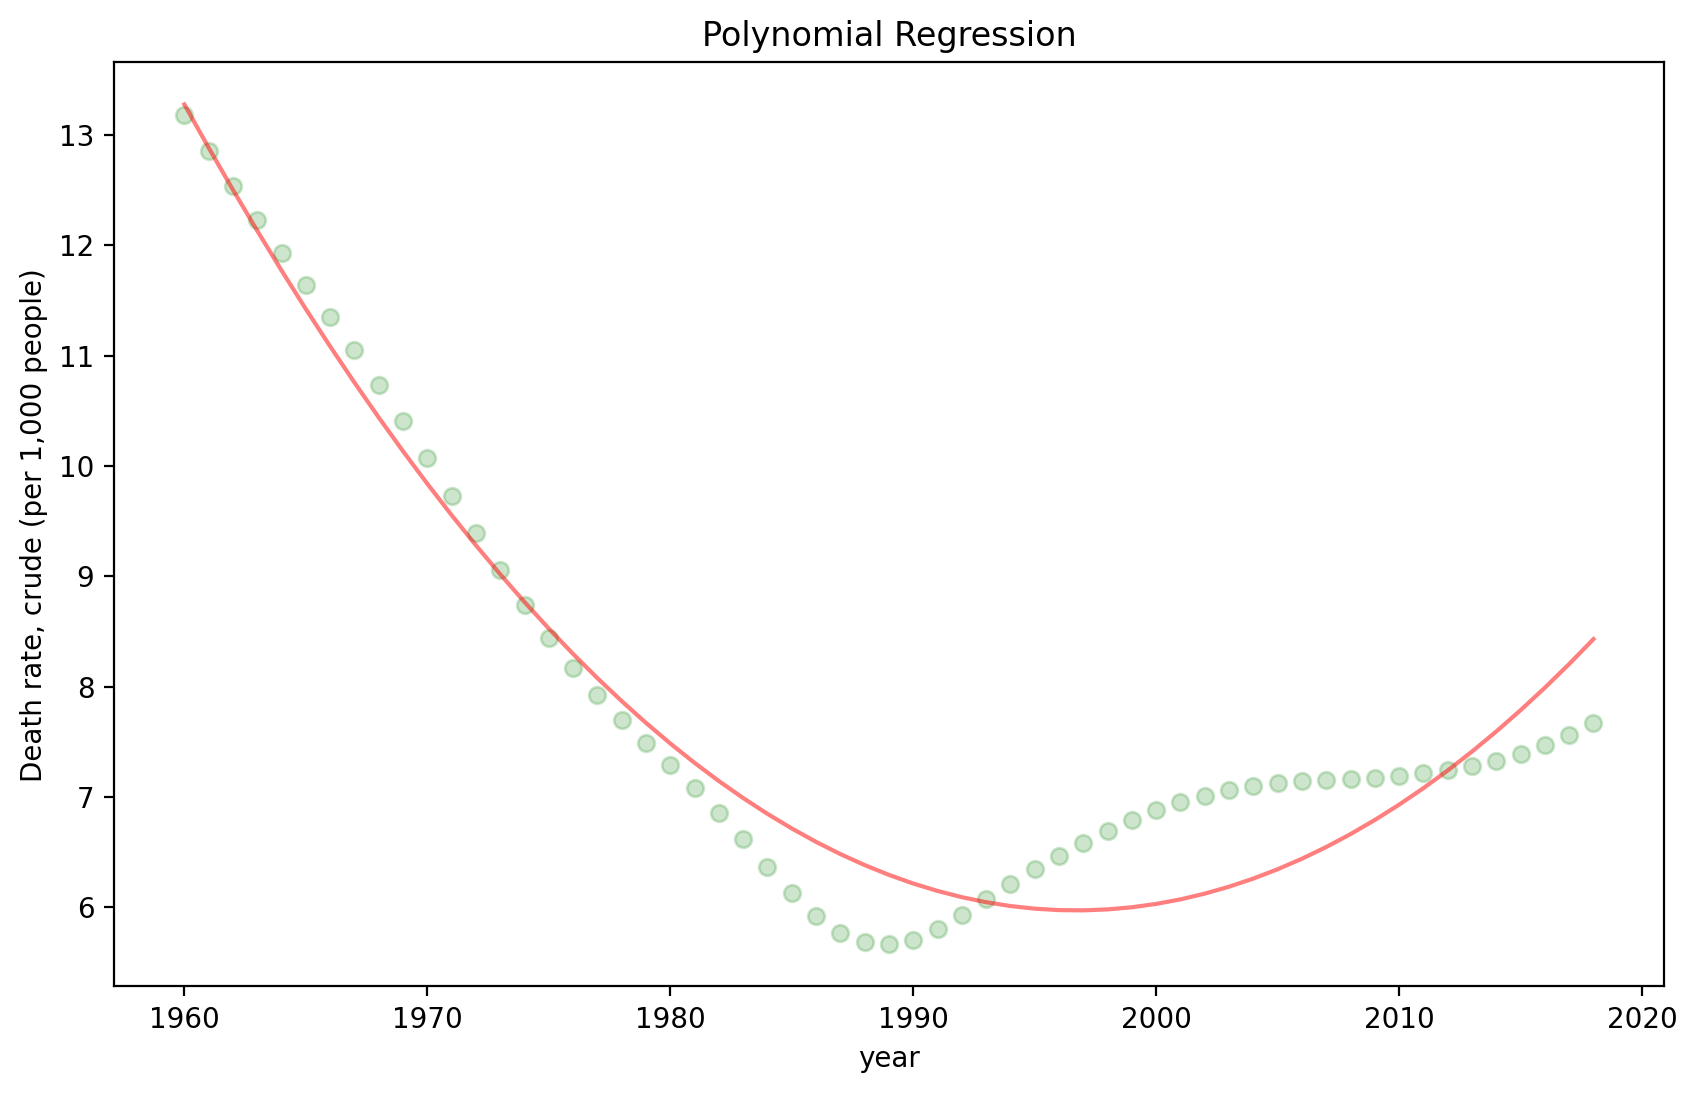

In [40]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X, y, color='green', alpha=.2)
plt.plot(X, pm.predict(poly_reg.fit_transform(X)), color='red', alpha=.5)
plt.title('Polynomial Regression')
plt.xlabel(x_col)
plt.ylabel(y_col)

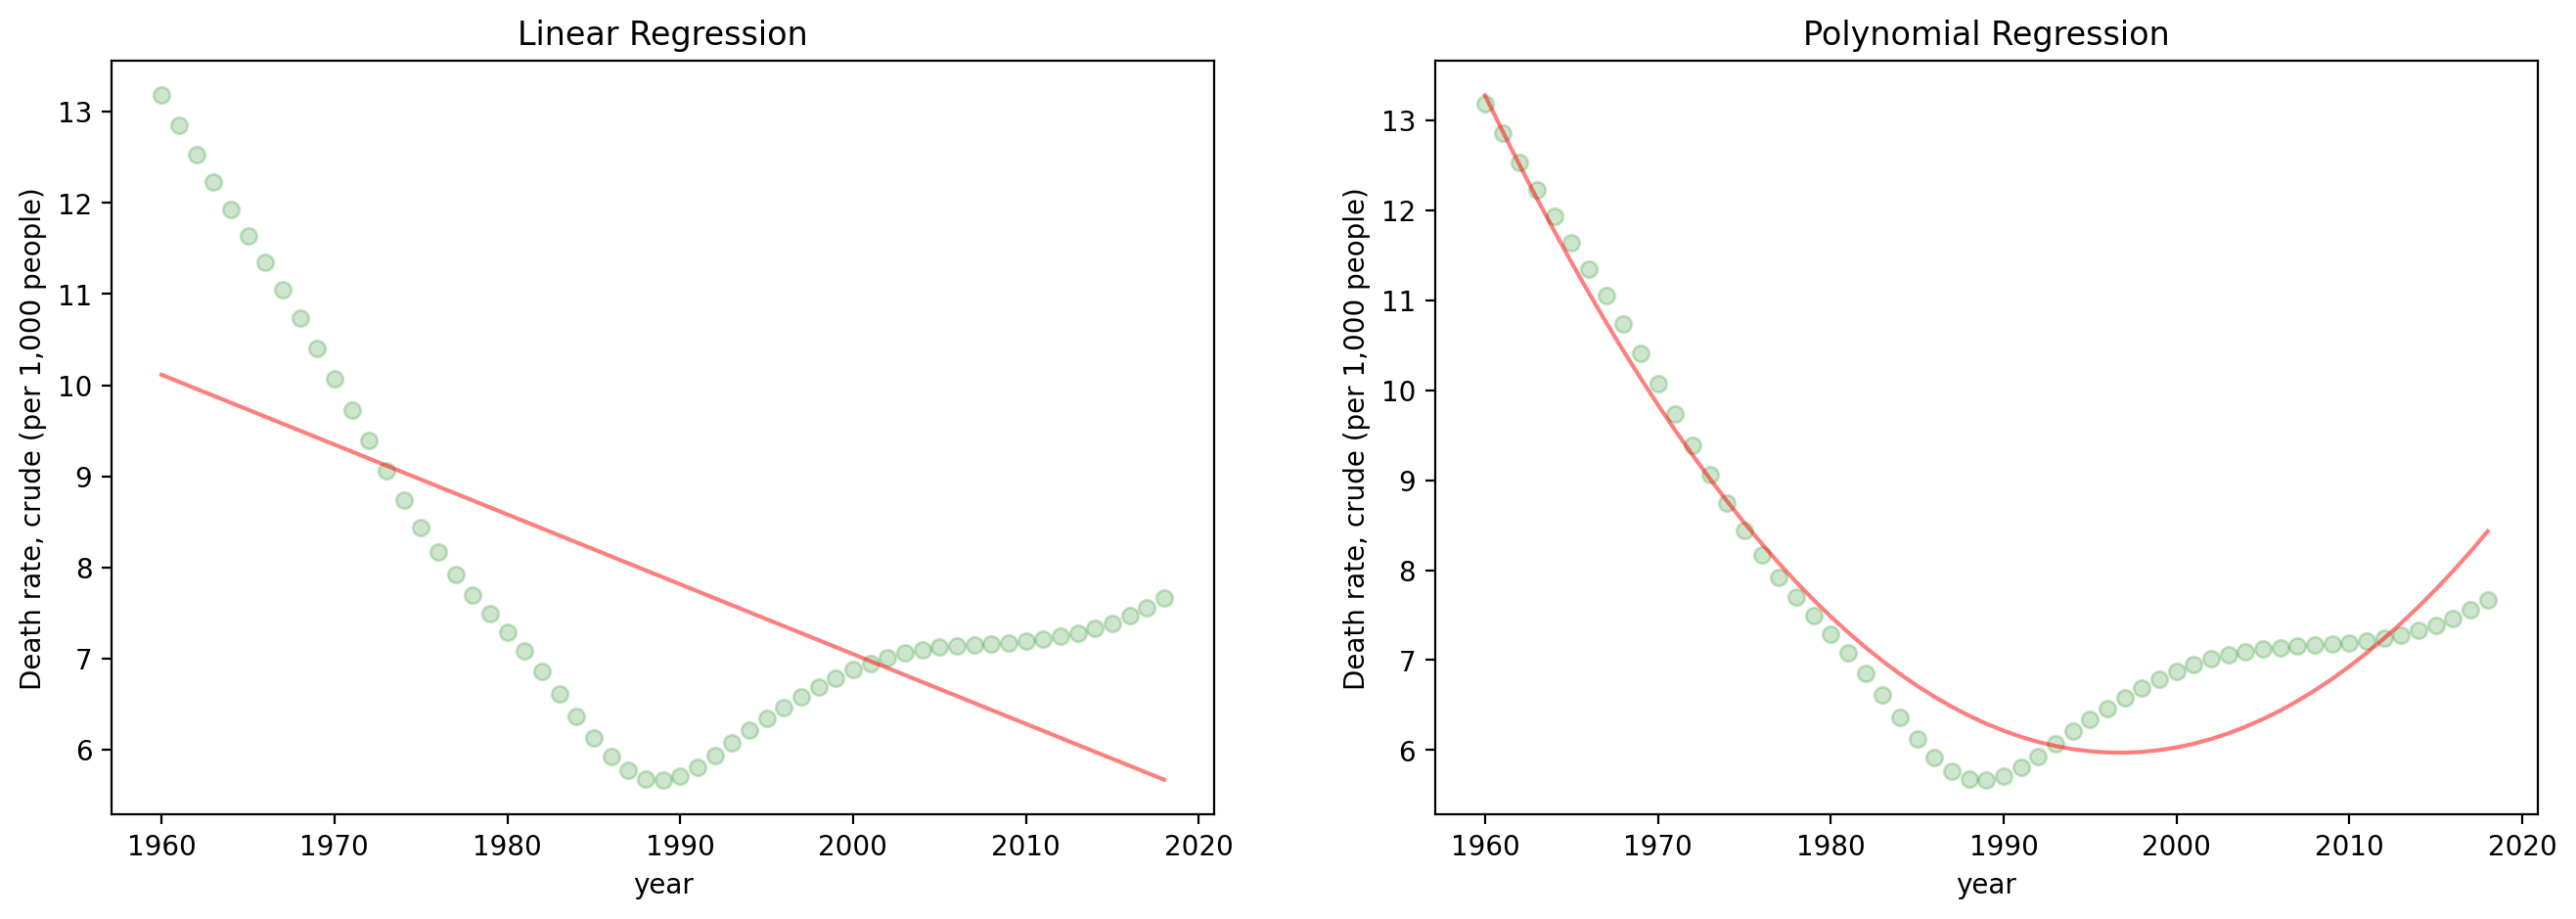

In [39]:
fig = plt.figure(figsize=(8*2,5))
d={'Linear Regression': lm.predict(X),
    'Polynomial Regression': pm.predict(poly_reg.fit_transform(X))}
i=1

for title, y_pred in d.items():
    fig.add_subplot(1,2,i)
    plt.scatter(X, y, color='green', alpha=.2)
    plt.plot(X, y_pred, color='red', alpha=.5)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    i +=1

#### 1.2.3 Plot varying by degree

degree = 1: R_square (train) = 0.4353, (test) = 0.5856
degree = 2: R_square (train) = 0.9448, (test) = 0.9491
degree = 3: R_square (train) = 0.9641, (test) = 0.9814
degree = 4: R_square (train) = 0.9644, (test) = 0.9815
degree = 5: R_square (train) = 0.9647, (test) = 0.9817
degree = 6: R_square (train) = 0.9649, (test) = 0.9819


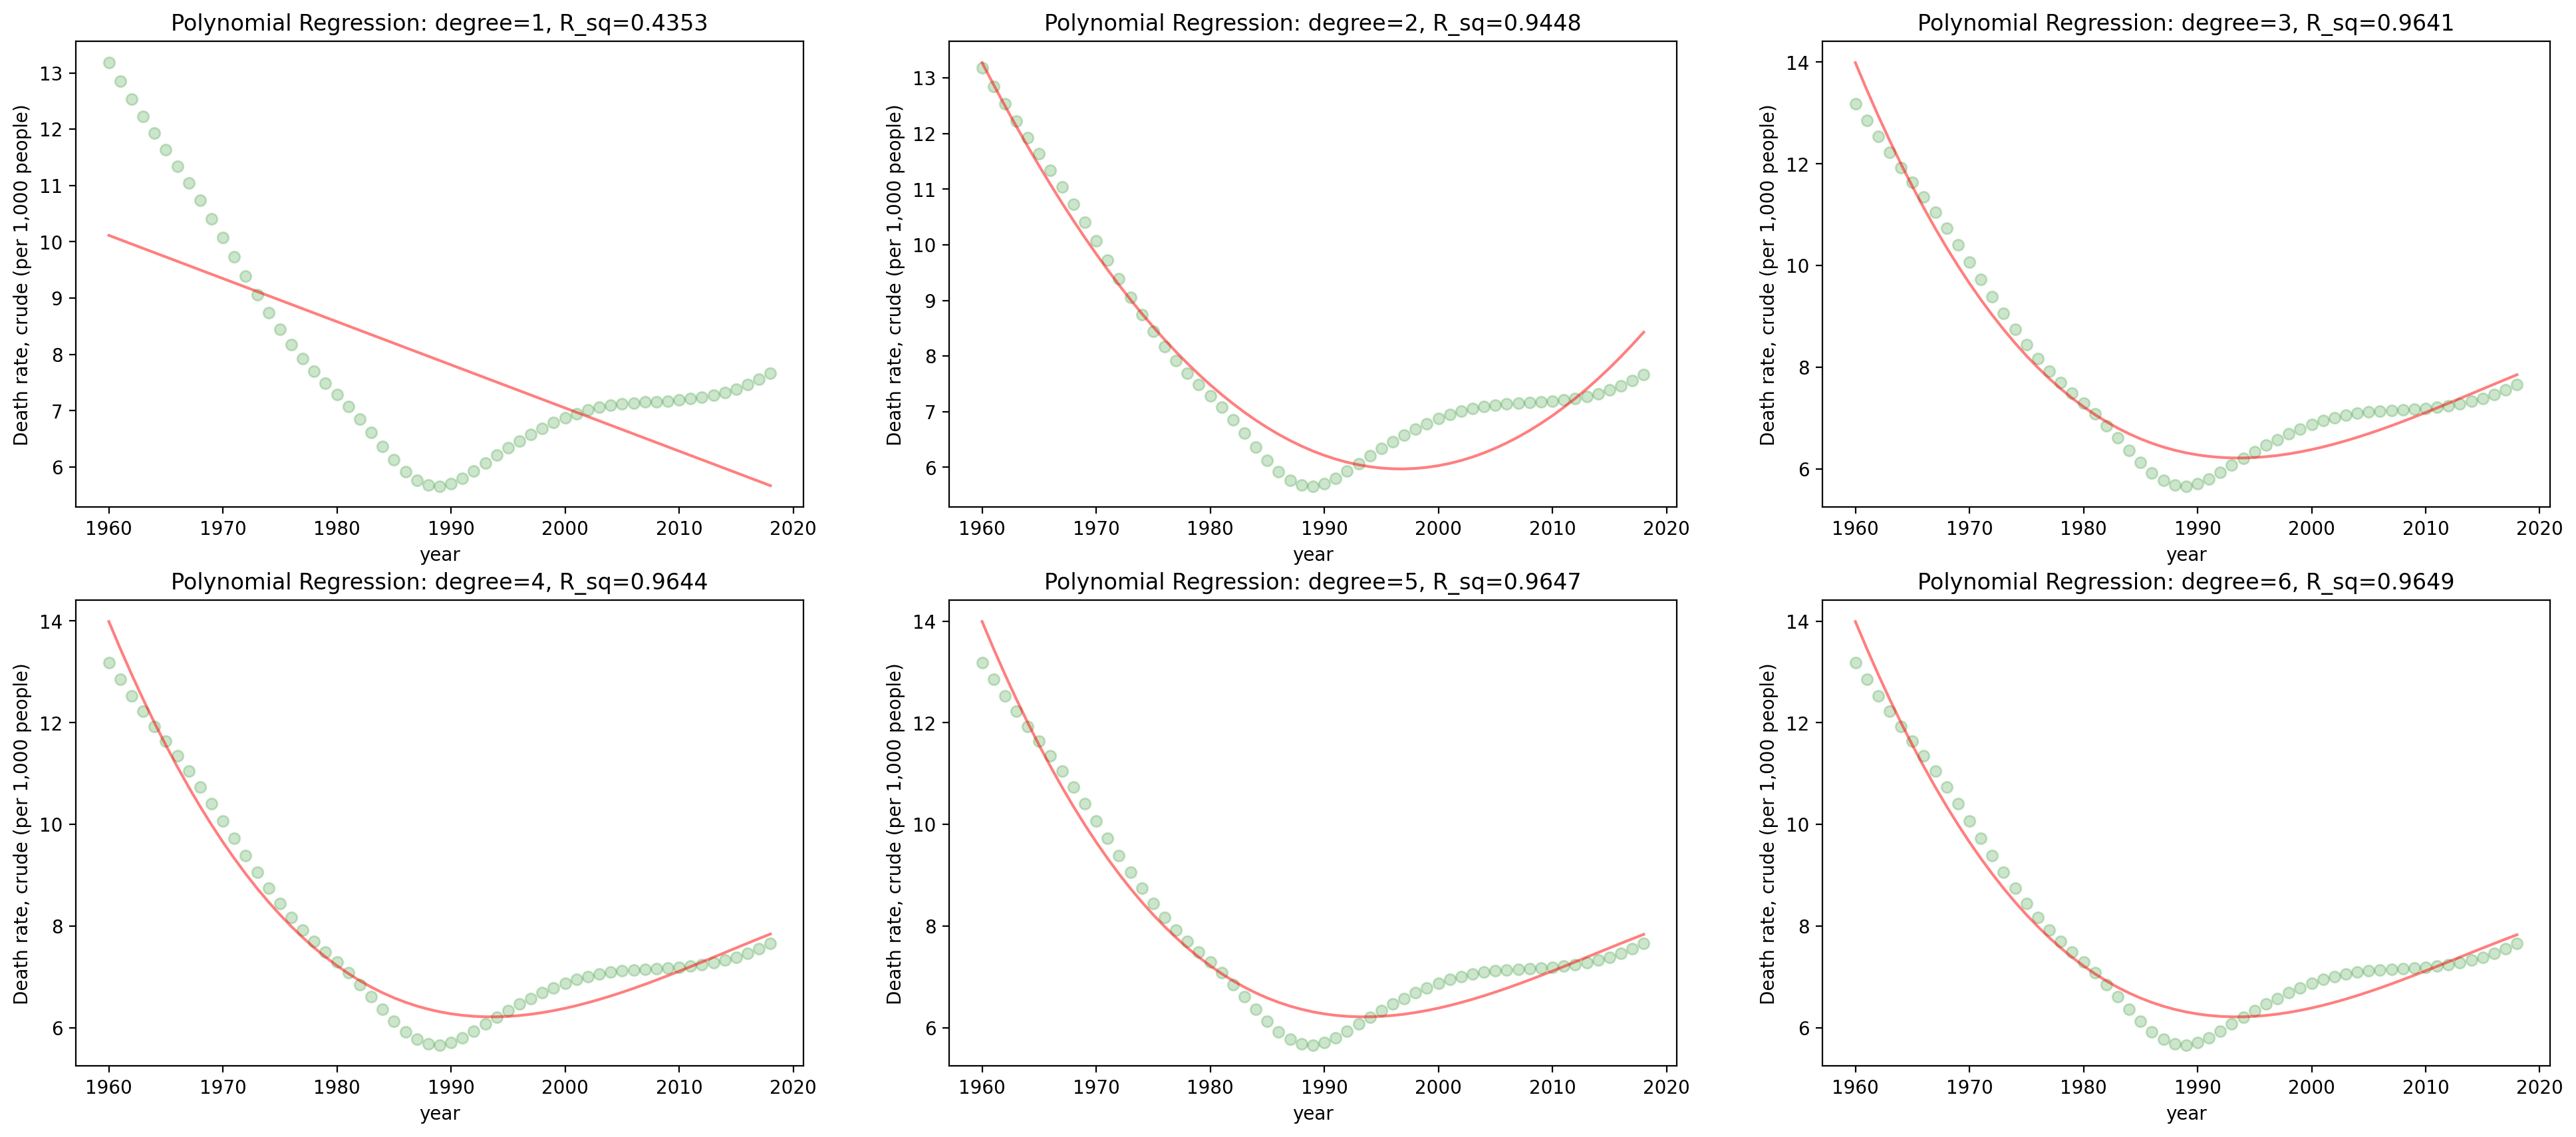

In [42]:
def plots(degree_ranges=range(2,8)):
    import math
    n=len(degree_ranges)
    n_rows=2
    n_cols=math.ceil(n/n_rows)
    fig=plt.figure(figsize=(8*n_cols, 5*n_rows))
    i=1

    for degree in degree_ranges:
        poly_reg = PolynomialFeatures(degree=degree)
        X_train_poly = poly_reg.fit_transform(X_train)
        X_test_poly = poly_reg.fit_transform(X_test)

        poly_reg.fit(X_train_poly, y_train)
        pm = LinearRegression()
        pm.fit(X_train_poly, y_train)
        rsq_train=pm.score(X_train_poly, y_train) # R-squared
        rsq_test=pm.score(X_test_poly, y_test) # R-squared
        print(f'degree = {degree}: R_square (train) = {rsq_train:.4f}, (test) = {rsq_test:.4f}')
            #print(pm.coef_)

        fig.add_subplot(n_rows, n_cols, i)
        y_pred=pm.predict(poly_reg.fit_transform(X))
        plt.scatter(X, y, color='green', alpha=.2)
        plt.plot(X, y_pred, color='red', alpha=.5)
        plt.title(f'Polynomial Regression: degree={degree}, R_sq={rsq_train:.4f}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        i += 1
    #plt.show()

plots(range(1, 7))

#### 1.3 statsmodels

#### 1.3.1 method 1 (using R formula style)

In [43]:
dt=X_train.copy()
dt[y_col]=y_train
dt[:5]

,year,"Death rate, crude (per 1,000 people)"
14019,1996,6.465
14023,2000,6.877
14007,1984,6.367
13993,1970,10.072
14034,2011,7.213


In [44]:
dt.columns=['year','death_rate']

In [45]:
import statsmodels.formula.api as smf

formula = 'death_rate ~ year + I(year**2)' # degree = 2
model1 = smf.ols(formula=formula, data=dt)
model1_fit=model1.fit()

In [47]:
print(model1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     376.8
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           2.08e-28
Time:                        19:58:22   Log-Likelihood:                -30.931
No. Observations:                  47   AIC:                             67.86
Df Residuals:                      44   BIC:                             73.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.162e+04   1064.573     20.308   

In [48]:
pm.intercept_

21619.43539756367

In [49]:
pm.coef_

array([ 0.00000000e+00, -2.16491346e+01,  5.42121601e-03])

In [50]:
pm.score(X_train_poly, y_train) # R-squared

0.9448282949367037

In [51]:
model1.exog[:5,]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06],
       [1.000000e+00, 1.970000e+03, 3.880900e+06],
       [1.000000e+00, 2.011000e+03, 4.044121e+06]])

In [52]:
X_train_poly[:5]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06],
       [1.000000e+00, 1.970000e+03, 3.880900e+06],
       [1.000000e+00, 2.011000e+03, 4.044121e+06]])

In [53]:
model1_fit.predict(dt['year'][:5])

14019    5.974125
14023    6.030303
14007    6.846463
13993    9.837513
14034    7.079295
dtype: float64

In [54]:
pm.predict(X_train_poly[:5])

array([5.97412483, 6.0303033 , 6.84646291, 9.83751329, 7.07929472])

#### 1.3.2 method 2 (use sm.OLS)

In [55]:
import statsmodels.api as sm

model2 = sm.OLS(y_train, X_train_poly)

model2_fit=model2.fit()
print(model2_fit.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Death rate, crude (per 1,000 people)   R-squared:                       0.945
Model:                                              OLS   Adj. R-squared:                  0.942
Method:                                   Least Squares   F-statistic:                     376.8
Date:                                  Sun, 04 Feb 2024   Prob (F-statistic):           2.08e-28
Time:                                          20:02:38   Log-Likelihood:                -30.931
No. Observations:                                    47   AIC:                             67.86
Df Residuals:                                        44   BIC:                             73.41
Df Model:                                             2                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [56]:
model2_fit.predict(X_train_poly[:5])

array([5.97412484, 6.0303033 , 6.84646292, 9.8375133 , 7.07929473])

In [57]:
pm.predict(X_train_poly[:5])

array([5.97412483, 6.0303033 , 6.84646291, 9.83751329, 7.07929472])

In [58]:
model1_fit.predict(dt['year'][:5])

14019    5.974125
14023    6.030303
14007    6.846463
13993    9.837513
14034    7.079295
dtype: float64